# Best Selling Book Prices Webscraper

## To fix:

Currently scraper iterates through 5 web pages per category for all best selling categories. But currently those pages are the first page (it iterates over it 5 times)

### Imports

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Create list of categories

In [9]:
r = requests.get('https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_unv_b_1_4_1')
soup = BeautifulSoup(r.text, 'html.parser')
category_list = soup.find_all('ul',attrs={'id':'zg_browseRoot'})

In [10]:
category_links = category_list[0].find_all('a')

In [11]:
len(category_links)

38

In [12]:
category_links[1]['href'][42:] #Example category

'Arts-Photography/zgbs/books/1'

In [13]:
category_url_endings=[]

for i in range(1,len(category_links)): #Start at 1 to skip "all books category"
    category_url_endings.append(category_links[i]['href'][42:])

In [14]:
#https://www.amazon.com/Best-Sellers-Books-Childrens/zgbs/books/4/ref=zg_bs_nav_b_1_b
#https://www.amazon.com/Best-Sellers-Books-Computers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b

In [15]:
category_url_endings.remove('Audible-Audiobooks/zgbs/books/2402172011') #Remove audible books

In [16]:
category_url_endings[5]

'Childrens/zgbs/books/4'

In [17]:
category_names=[]

for ending in category_url_endings:
    category_names.append(ending.split('/')[0])

In [22]:
category_names[:3]

['Arts-Photography', 'Biographies', 'CD']

### Scrape pages

In [23]:
#https://www.amazon.com/Best-Sellers-Books-Biographies/zgbs/books/2/ref=zg_bs_nav_b_1_b#3

In [ ]:
https://www.amazon.com/Best-Sellers-Books-Arts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b
https://www.amazon.com/Best-Sellers-BooksArts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#2
https://www.amazon.com/Best-Sellers-Books-Arts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#2
    
https://www.amazon.com/Best-Sellers-BooksArts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#3
    
https://www.amazon.com/Best-Sellers-Books-Comics-Graphic-Novels/zgbs/books/4366/ref=zg_bs_nav_b_1_b
https://www.amazon.com/Best-Sellers-Books-Comics-Graphic-Novels/zgbs/books/4366/ref=zg_bs_nav_b_1_b#2
    
    https://www.amazon.com/Best-Sellers-BooksComputers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b#3

In [ ]:
https://www.amazon.com/Best-Sellers-Books-Computers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b
https://www.amazon.com/Best-Sellers-Books-Computers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b#3
https://www.amazon.com/Best-Sellers-Books-Computers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b#2
https://www.amazon.com/Best-Sellers-Books-Computers-Technology/zgbs/books/5/ref=zg_bs_nav_b_1_b#2

In [29]:
prices = []
titles = []
categories = []

for category,ending in zip(category_names,category_url_endings):
    print(category)
    print(ending)
    print('** Parsing {} Category **'.format(category))

    for i in range(1,6):
        print('Parsing Page {}...'.format(i))
        #print('https://www.amazon.com/Best-Sellers-Books'+ending+'/ref=zg_bs_nav_b_1_b#'+str(i)
        url= 'https://www.amazon.com/Best-Sellers-Books-'+ending+'/ref=zg_bs_nav_b_1_b#'+str(i)
        r = requests.get(url)
        print(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        book_divs = soup.find_all('div',attrs={'class':'zg_itemImmersion'})

        for book in book_divs:
            titles.append(book.find('div',attrs={'class':'p13n-sc-truncate'}).text.strip())
            try: 
                prices.append(book.find('span',attrs={'class':'p13n-sc-price'}).text[1:])
            except: #Exception for audible books
                print('  Audible book: {}'.format(titles[-1]))
                prices.append(-1)
            categories.append(category)
        print('Last Title for Page: {}'.format(titles[-1]))
                

prices = [float(p) for p in prices]

Arts-Photography
Arts-Photography/zgbs/books/1
** Parsing Arts-Photography Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Arts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#1
  Audible book: Born a Crime: Stories from a South African Childhood
  Audible book: Al Franken, Giant of the Senate
Calm the F*ck Down: An Irreverent Adult Coloring Book
Parsing Page 2...
https://www.amazon.com/Best-Sellers-Books-Arts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#2
  Audible book: Born a Crime: Stories from a South African Childhood
  Audible book: Al Franken, Giant of the Senate
Calm the F*ck Down: An Irreverent Adult Coloring Book
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-Arts-Photography/zgbs/books/1/ref=zg_bs_nav_b_1_b#3
  Audible book: Born a Crime: Stories from a South African Childhood
  Audible book: Al Franken, Giant of the Senate
Calm the F*ck Down: An Irreverent Adult Coloring Book
Parsing Page 4...
https://www.amazon.com/Best-Sellers-Books-Arts

https://www.amazon.com/Best-Sellers-Books-Childrens/zgbs/books/4/ref=zg_bs_nav_b_1_b#5
Dear Zoo: A Lift-the-Flap Book
Christian-Bibles
Christian-Bibles/zgbs/books/12290
** Parsing Christian-Bibles Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Christian-Bibles/zgbs/books/12290/ref=zg_bs_nav_b_1_b#1
  Audible book: The Five Love Languages: The Secret to Love That Lasts
Daring to Hope: Finding God's Goodness in the Broken and the Beautiful
Parsing Page 2...
https://www.amazon.com/Best-Sellers-Books-Christian-Bibles/zgbs/books/12290/ref=zg_bs_nav_b_1_b#2
  Audible book: The Five Love Languages: The Secret to Love That Lasts
Daring to Hope: Finding God's Goodness in the Broken and the Beautiful
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-Christian-Bibles/zgbs/books/12290/ref=zg_bs_nav_b_1_b#3
  Audible book: The Five Love Languages: The Secret to Love That Lasts
Daring to Hope: Finding God's Goodness in the Broken and the Beautiful
Parsing Page 4...

https://www.amazon.com/Best-Sellers-Books-Crafts-Hobbies-Home/zgbs/books/48/ref=zg_bs_nav_b_1_b#5
  Audible book: The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing
Disney Dreams Collection Thomas Kinkade Studios Coloring Book
Deals
Deals/zgbs/books/45
** Parsing Deals Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Deals/zgbs/books/45/ref=zg_bs_nav_b_1_b#1
The Lemonade War (The Lemonade War Series)
Parsing Page 2...
https://www.amazon.com/Best-Sellers-Books-Deals/zgbs/books/45/ref=zg_bs_nav_b_1_b#2
The Lemonade War (The Lemonade War Series)
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-Deals/zgbs/books/45/ref=zg_bs_nav_b_1_b#3
The Lemonade War (The Lemonade War Series)
Parsing Page 4...
https://www.amazon.com/Best-Sellers-Books-Deals/zgbs/books/45/ref=zg_bs_nav_b_1_b#4
The Lemonade War (The Lemonade War Series)
Parsing Page 5...
https://www.amazon.com/Best-Sellers-Books-Deals/zgbs/books/45/ref=zg_bs_nav_b_1_b#5


https://www.amazon.com/Best-Sellers-Books-Health-Fitness-Dieting/zgbs/books/10/ref=zg_bs_nav_b_1_b#4
  Audible book: The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life
  Audible book: Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
  Audible book: The Power of Habit: Why We Do What We Do in Life and Business
  Audible book: Unfu*k Yourself
  Audible book: Why Buddhism Is True: The Science and Philosophy of Enlightenment
Why Buddhism Is True: The Science and Philosophy of Enlightenment
Parsing Page 5...
https://www.amazon.com/Best-Sellers-Books-Health-Fitness-Dieting/zgbs/books/10/ref=zg_bs_nav_b_1_b#5
  Audible book: The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life
  Audible book: Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
  Audible book: The Power of Habit: Why We Do What We Do in Life and Business
  Audible book: Unfu*k Yourself
  Audi

https://www.amazon.com/Best-Sellers-Books-Libros-en-español/zgbs/books/16568978011/ref=zg_bs_nav_b_1_b#3
Lady Brianna (Spanish Edition)
Parsing Page 4...
https://www.amazon.com/Best-Sellers-Books-Libros-en-español/zgbs/books/16568978011/ref=zg_bs_nav_b_1_b#4
Lady Brianna (Spanish Edition)
Parsing Page 5...
https://www.amazon.com/Best-Sellers-Books-Libros-en-español/zgbs/books/16568978011/ref=zg_bs_nav_b_1_b#5
Lady Brianna (Spanish Edition)
Literature-Fiction
Literature-Fiction/zgbs/books/17
** Parsing Literature-Fiction Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Literature-Fiction/zgbs/books/17/ref=zg_bs_nav_b_1_b#1
  Audible book: It
  Audible book: Sleeping Beauties: A Novel
Wrong Number, Right Guy
Parsing Page 2...
https://www.amazon.com/Best-Sellers-Books-Literature-Fiction/zgbs/books/17/ref=zg_bs_nav_b_1_b#2
  Audible book: It
  Audible book: Sleeping Beauties: A Novel
Wrong Number, Right Guy
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-

https://www.amazon.com/Best-Sellers-Books-Politics-Social-Sciences/zgbs/books/3377866011/ref=zg_bs_nav_b_1_b#2
  Audible book: What Happened
  Audible book: Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
  Audible book: Hillbilly Elegy: A Memoir of a Family and Culture in Crisis
  Audible book: Al Franken, Giant of the Senate
Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-Politics-Social-Sciences/zgbs/books/3377866011/ref=zg_bs_nav_b_1_b#3
  Audible book: What Happened
  Audible book: Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
  Audible book: Hillbilly Elegy: A Memoir of a Family and Culture in Crisis
  Audible book: Al Franken, Giant of the Senate
Braving the Wilderness: The Quest for True Belonging and the Courage to Stand Alone
Parsing Page 4...
https://www.amazon.com/Best-Sellers-Books-Politics-Social-Sciences

https://www.amazon.com/Best-Sellers-Books-Science-Math/zgbs/books/75/ref=zg_bs_nav_b_1_b#5
  Audible book: Astrophysics for People in a Hurry
  Audible book: Sapiens: A Brief History of Humankind
  Audible book: Algorithms to Live By: The Computer Science of Human Decisions
  Audible book: Elon Musk: Tesla, SpaceX, and the Quest for a Fantastic Future
  Audible book: The Art of Invisibility: The World's Most Famous Hacker Teaches You How to Be Safe in the Age of Big Brother and Big Data
Astrophysics for People in a Hurry
Science-Fiction-Fantasy
Science-Fiction-Fantasy/zgbs/books/25
** Parsing Science-Fiction-Fantasy Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Science-Fiction-Fantasy/zgbs/books/25/ref=zg_bs_nav_b_1_b#1
  Audible book: Black Ops: Expeditionary Force, Book 4
  Audible book: Paradox Bound: A Novel
  Audible book: A Game of Thrones: A Song of Ice and Fire, Book 1
  Audible book: Ready Player One
Ready Player One
Parsing Page 2...
https://www.amaz

https://www.amazon.com/Best-Sellers-Books-Teen-Young-Adult/zgbs/books/28/ref=zg_bs_nav_b_1_b#2
Elementals: The Complete Series
Parsing Page 3...
https://www.amazon.com/Best-Sellers-Books-Teen-Young-Adult/zgbs/books/28/ref=zg_bs_nav_b_1_b#3
Elementals: The Complete Series
Parsing Page 4...
https://www.amazon.com/Best-Sellers-Books-Teen-Young-Adult/zgbs/books/28/ref=zg_bs_nav_b_1_b#4
Elementals: The Complete Series
Parsing Page 5...
https://www.amazon.com/Best-Sellers-Books-Teen-Young-Adult/zgbs/books/28/ref=zg_bs_nav_b_1_b#5
Elementals: The Complete Series
Test-Preparation
Test-Preparation/zgbs/books/5267710011
** Parsing Test-Preparation Category **
Parsing Page 1...
https://www.amazon.com/Best-Sellers-Books-Test-Preparation/zgbs/books/5267710011/ref=zg_bs_nav_b_1_b#1
  Audible book: Esperanza Rising
  Audible book: Where the Red Fern Grows
ATI TEAS Secrets Study Guide: TEAS 6 Complete Study Manual, Full-Length Practice Tests, Review Video Tutorials for the Test of Essential Academic S

### Create dataframe

In [30]:
books = pd.DataFrame({'Price':prices,'Title':titles,'Category':categories})

books.head()

,Category,Price,Title
0,Arts-Photography,2.99,Boys in the Trees: A Memoir
1,Arts-Photography,34.10,The Legend of Zelda Encyclopedia
2,Arts-Photography,9.59,The 5 Love Languages: The Secret to Love that ...
3,Arts-Photography,-1.00,Born a Crime: Stories from a South African Chi...
4,Arts-Photography,18.00,The Atlas of Beauty: Women of the World in 500...


### Examine prices

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

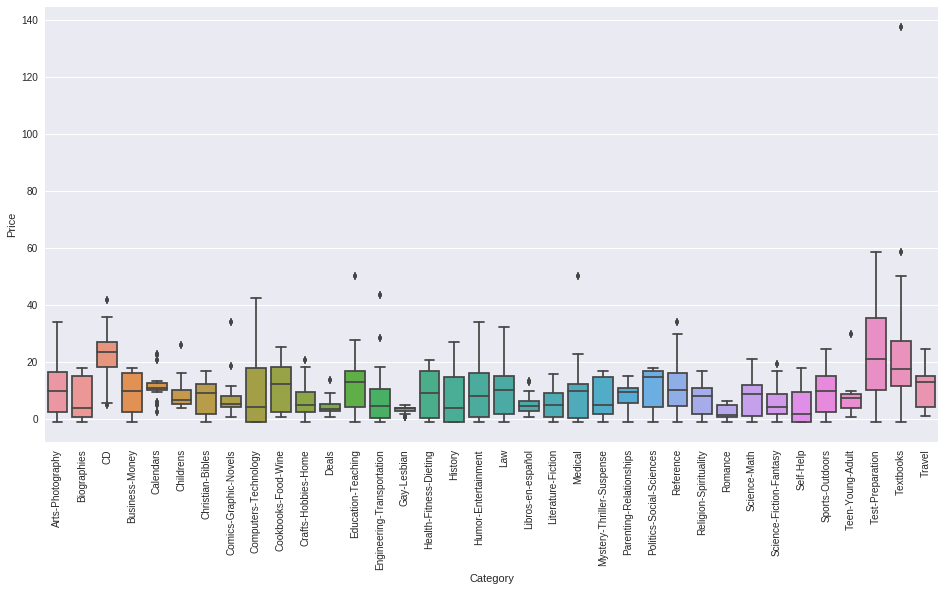

In [50]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Price',data=books,orient='v')

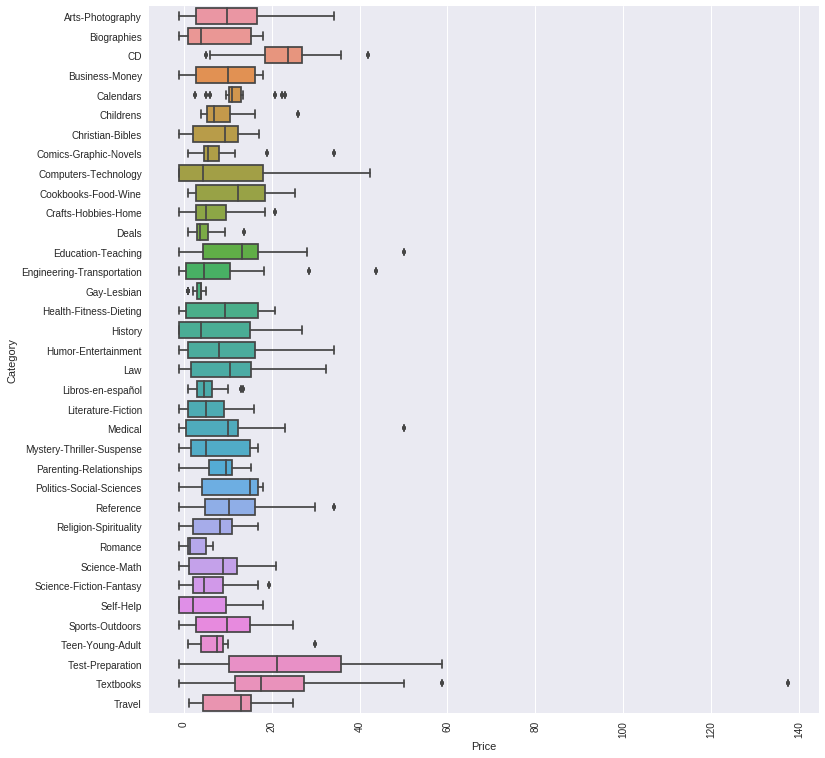

In [64]:
plt.figure(figsize=(12,13))
plt.xticks(rotation=90)
sns.boxplot(x='Price',y='Category',data=books,orient='h')

### Feature Extraction - Title length

In [53]:
books['Title Length'] = books['Title'].apply(lambda x: len(x))

In [54]:
books.head()

,Category,Price,Title,Title Length
0,Arts-Photography,2.99,Boys in the Trees: A Memoir,27
1,Arts-Photography,34.10,The Legend of Zelda Encyclopedia,32
2,Arts-Photography,9.59,The 5 Love Languages: The Secret to Love that ...,51
3,Arts-Photography,-1.00,Born a Crime: Stories from a South African Chi...,52
4,Arts-Photography,18.00,The Atlas of Beauty: Women of the World in 500...,56


### Examine Title lengths

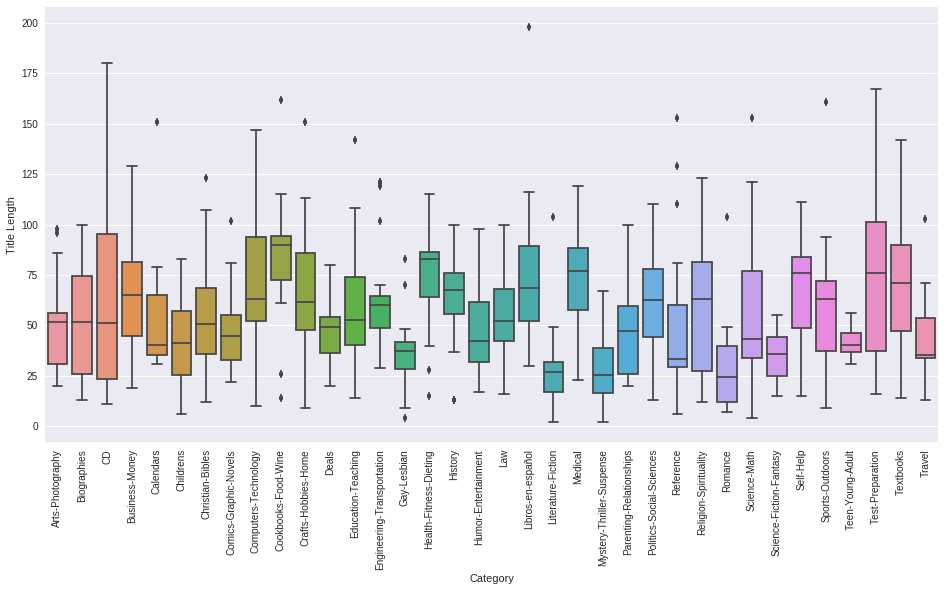

In [57]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Title Length',data=books)

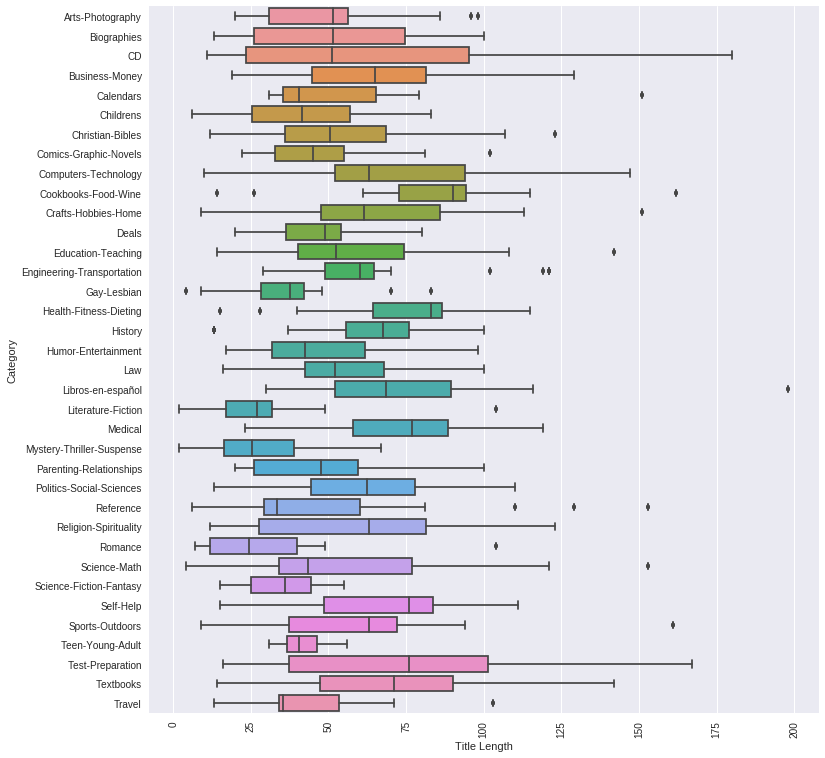

In [62]:
plt.figure(figsize=(12,13))
plt.xticks(rotation=90)
sns.boxplot(x='Title Length', y='Category',data=books,orient='h')